# <center> *Israel - Country Report* <center/>
## <center> *Date: 08.02.2021* <center/>
## <center> *By: Tal Levi* <center/>

In [35]:
import pandas as pd
from analysis.classes import Country
from datetime import datetime, date
import plotly
plotly.io.orca.config.executable = r'C:\Users\talle\AppData\Local\Programs\orca\orca.exe'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [36]:
country = Country('israel')
df = country.data  # Pandas df object, that contains the data from the db.


### Part One - Data information

In [37]:
print(country)


Countries name: Russia
Countries id: 4
Continent: Europe
Continent id: 4
Population: 145940072
First update: 2020-08-02
Last update: 2021-02-07
Data number of rows: 174
Data number of columns: 18
Columns: 
['Scrap_time', 'Update_time_GMT', 'Date', 'Country_id', 'Country', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'SeriousCritical', 'Tot_Cases_1Mpop', 'Deaths_1Mpop', 'TotalTests', 'Tests_1Mpop']
		


In [38]:
df.dtypes

Scrap_time                 object
Update_time_GMT            object
Date               datetime64[ns]
Country_id                  int64
Country                    object
Population                  int64
TotalCases                  int64
NewCases                  float64
TotalDeaths                 int64
NewDeaths                 float64
TotalRecovered              int64
NewRecovered              float64
ActiveCases                 int64
SeriousCritical             int64
Tot_Cases_1Mpop             int64
Deaths_1Mpop              float64
TotalTests                  int64
Tests_1Mpop                 int64
dtype: object

In [39]:

print('Number of null values are:')
pd.DataFrame(df.isnull().sum()).rename(columns = {0:'null_count'})

Number of null values are:


,null_count
Scrap_time,0
Update_time_GMT,59
Date,0
Country_id,0
Country,0
Population,0
TotalCases,0
NewCases,1
TotalDeaths,0
NewDeaths,1


In [40]:
print('The first five rows of the data:')
df.head(5)

The first five rows of the data:


,Scrap_time,Update_time_GMT,Date,Country_id,Country,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,Tot_Cases_1Mpop,Deaths_1Mpop,TotalTests,Tests_1Mpop
0,2020-08-02 20:00:00,NaN,2020-08-02,4,Russia,145940072,850870,NaN,14128,NaN,650173,NaN,186569,2300,5830,97.000,28793260,197295
1,2020-08-08 20:00:00,NaN,2020-08-08,4,Russia,145941094,882347,31477.000,14854,726.000,690207,40034.000,177286,2300,6046,102.000,30038123,205824
2,2020-08-12 20:00:00,NaN,2020-08-12,4,Russia,145941776,902701,20354.000,15260,406.000,710298,20091.000,177143,2300,6185,105.000,31307764,214522
3,2020-08-16 20:00:00,NaN,2020-08-16,4,Russia,145942457,922853,20152.000,15685,425.000,732968,22670.000,174200,2300,6323,107.000,32500000,222691
4,2020-08-17 20:00:00,NaN,2020-08-17,4,Russia,145942628,927745,4892.000,15740,55.000,736101,3133.000,175904,2300,6357,108.000,32700000,224061


In [41]:
print('The last five rows of the data.:')
df.tail(5)


The last five rows of the data.:


,Scrap_time,Update_time_GMT,Date,Country_id,Country,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,Tot_Cases_1Mpop,Deaths_1Mpop,TotalTests,Tests_1Mpop
169,2021-02-04 12:00:13,00:00:00,2021-02-03,4,Russia,145971764,3901204,16474.000,74684,526.000,3365367,24822.000,461153,2300,26726,512.000,102800000,704246
170,2021-02-05 12:00:12,00:00:00,2021-02-04,4,Russia,145971935,3917918,16714.000,75205,521.000,3389913,24546.000,452800,2300,26840,515.000,103200000,706985
171,2021-02-06 12:00:13,00:00:00,2021-02-05,4,Russia,145972105,3934606,16688.000,75732,527.000,3413495,23582.000,445379,2300,26955,519.000,103600000,709725
172,2021-02-07 21:06:30,00:00:00,2021-02-06,4,Russia,145972276,3951233,16627.000,76229,497.000,3436326,22831.000,438678,2300,27068,522.000,104000000,712464
173,2021-02-08 12:00:13,00:00:00,2021-02-07,4,Russia,145972446,3967281,16048.000,76661,432.000,3456210,19884.000,434410,2300,27178,525.000,104000000,712463


### Part Two - Data Visualization
#### Cumulative data

In [42]:
country.linear_plot(save = True)

#### Three months measures

In [43]:
months_info = country.three_months_info()
months_info

,Year,Month,ActiveCasesAvg,RecoveredSum,DeathsSum,CasesSum,CriticalSum
0,2020,Nov,"440,560.200","563,290","11,905","677,538","69,000"
1,2020,Dec,"511,519.290","775,636","17,124","863,643","71,300"
2,2021,Jan,"538,363.800","745,664","16,163","691,142","69,000"


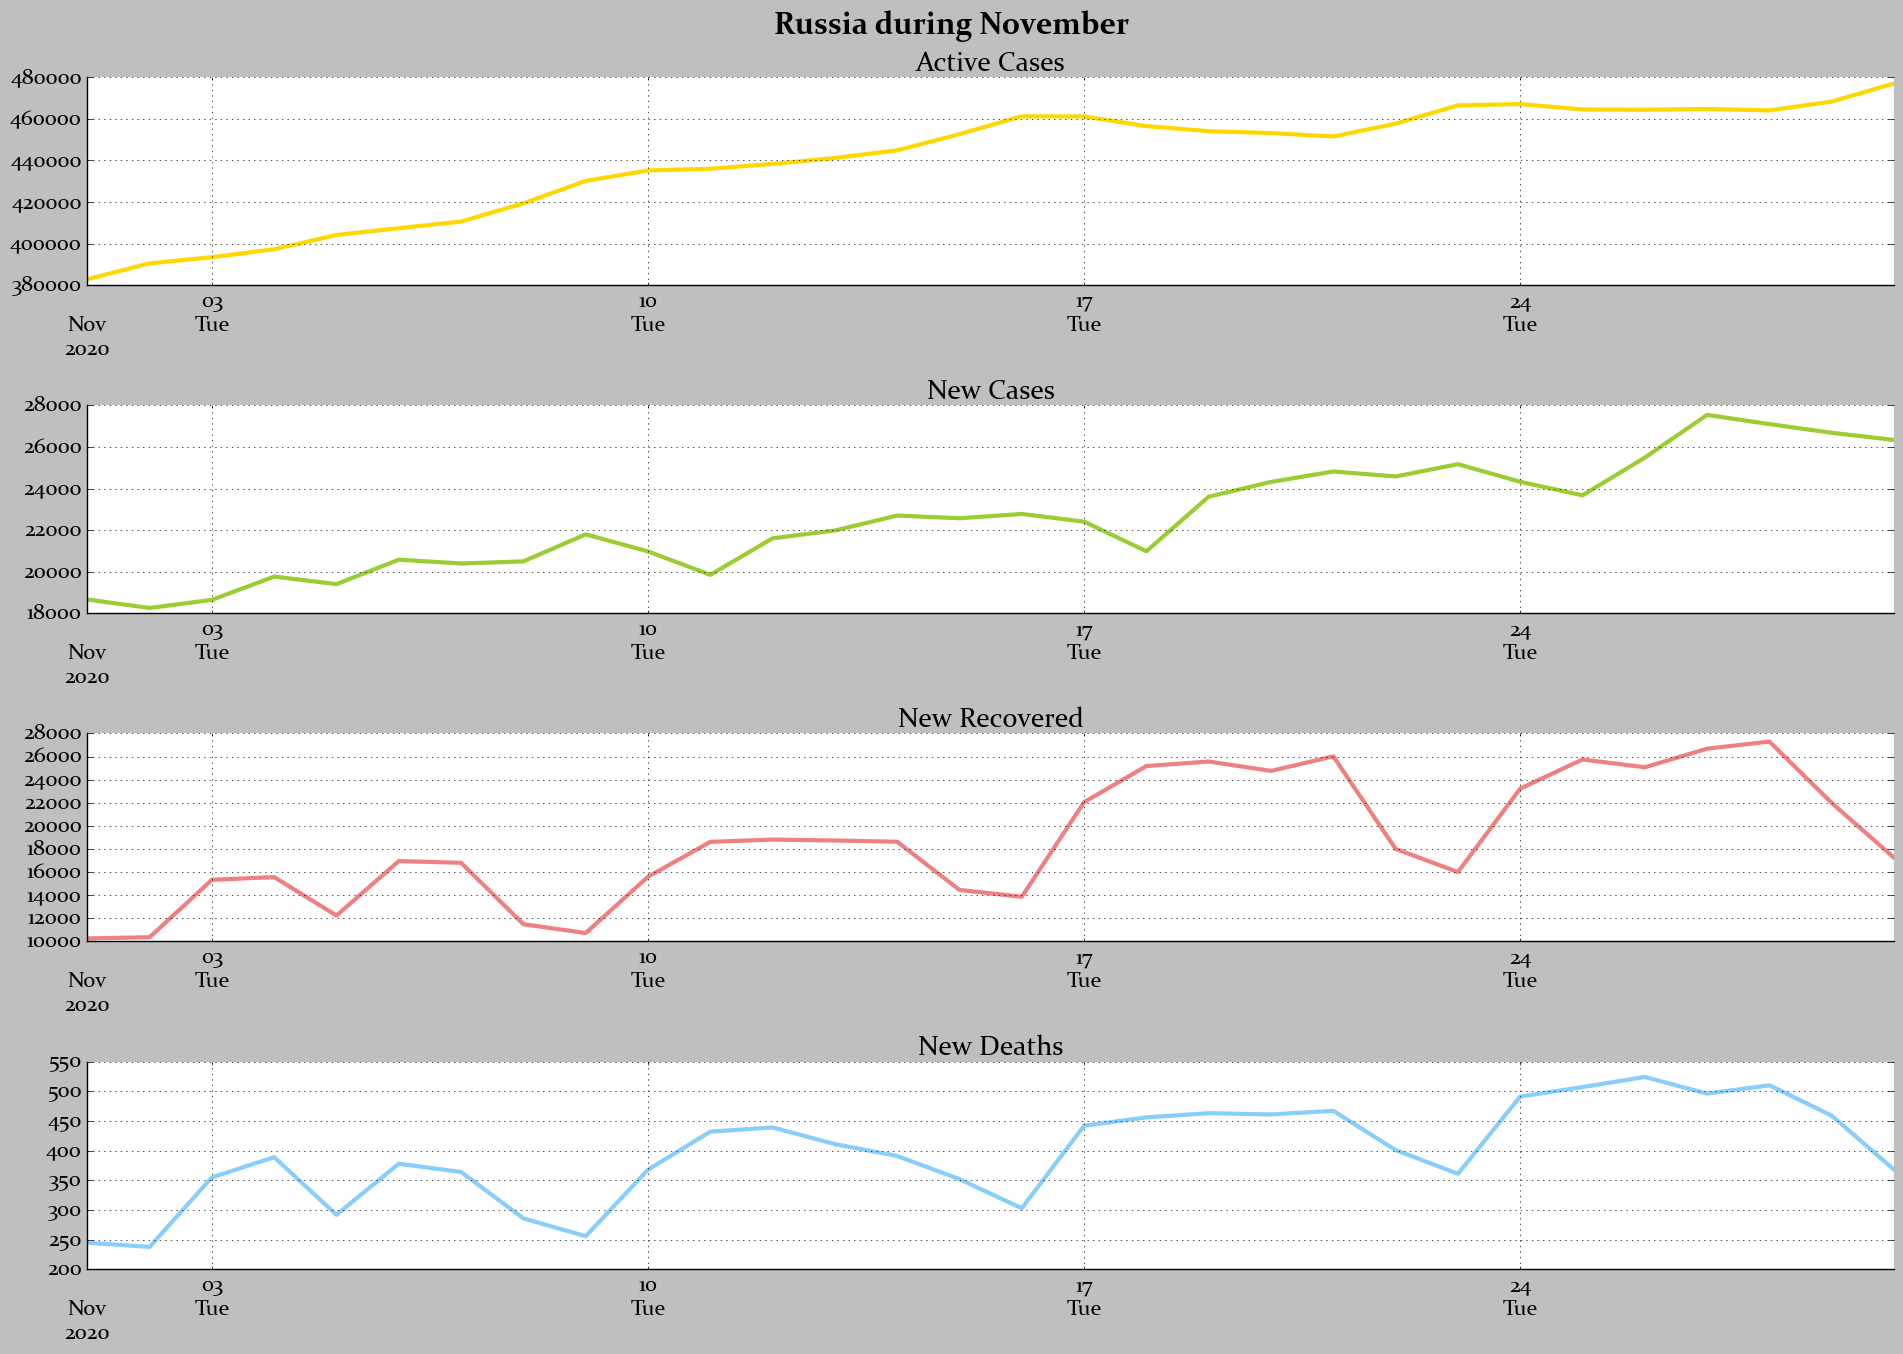

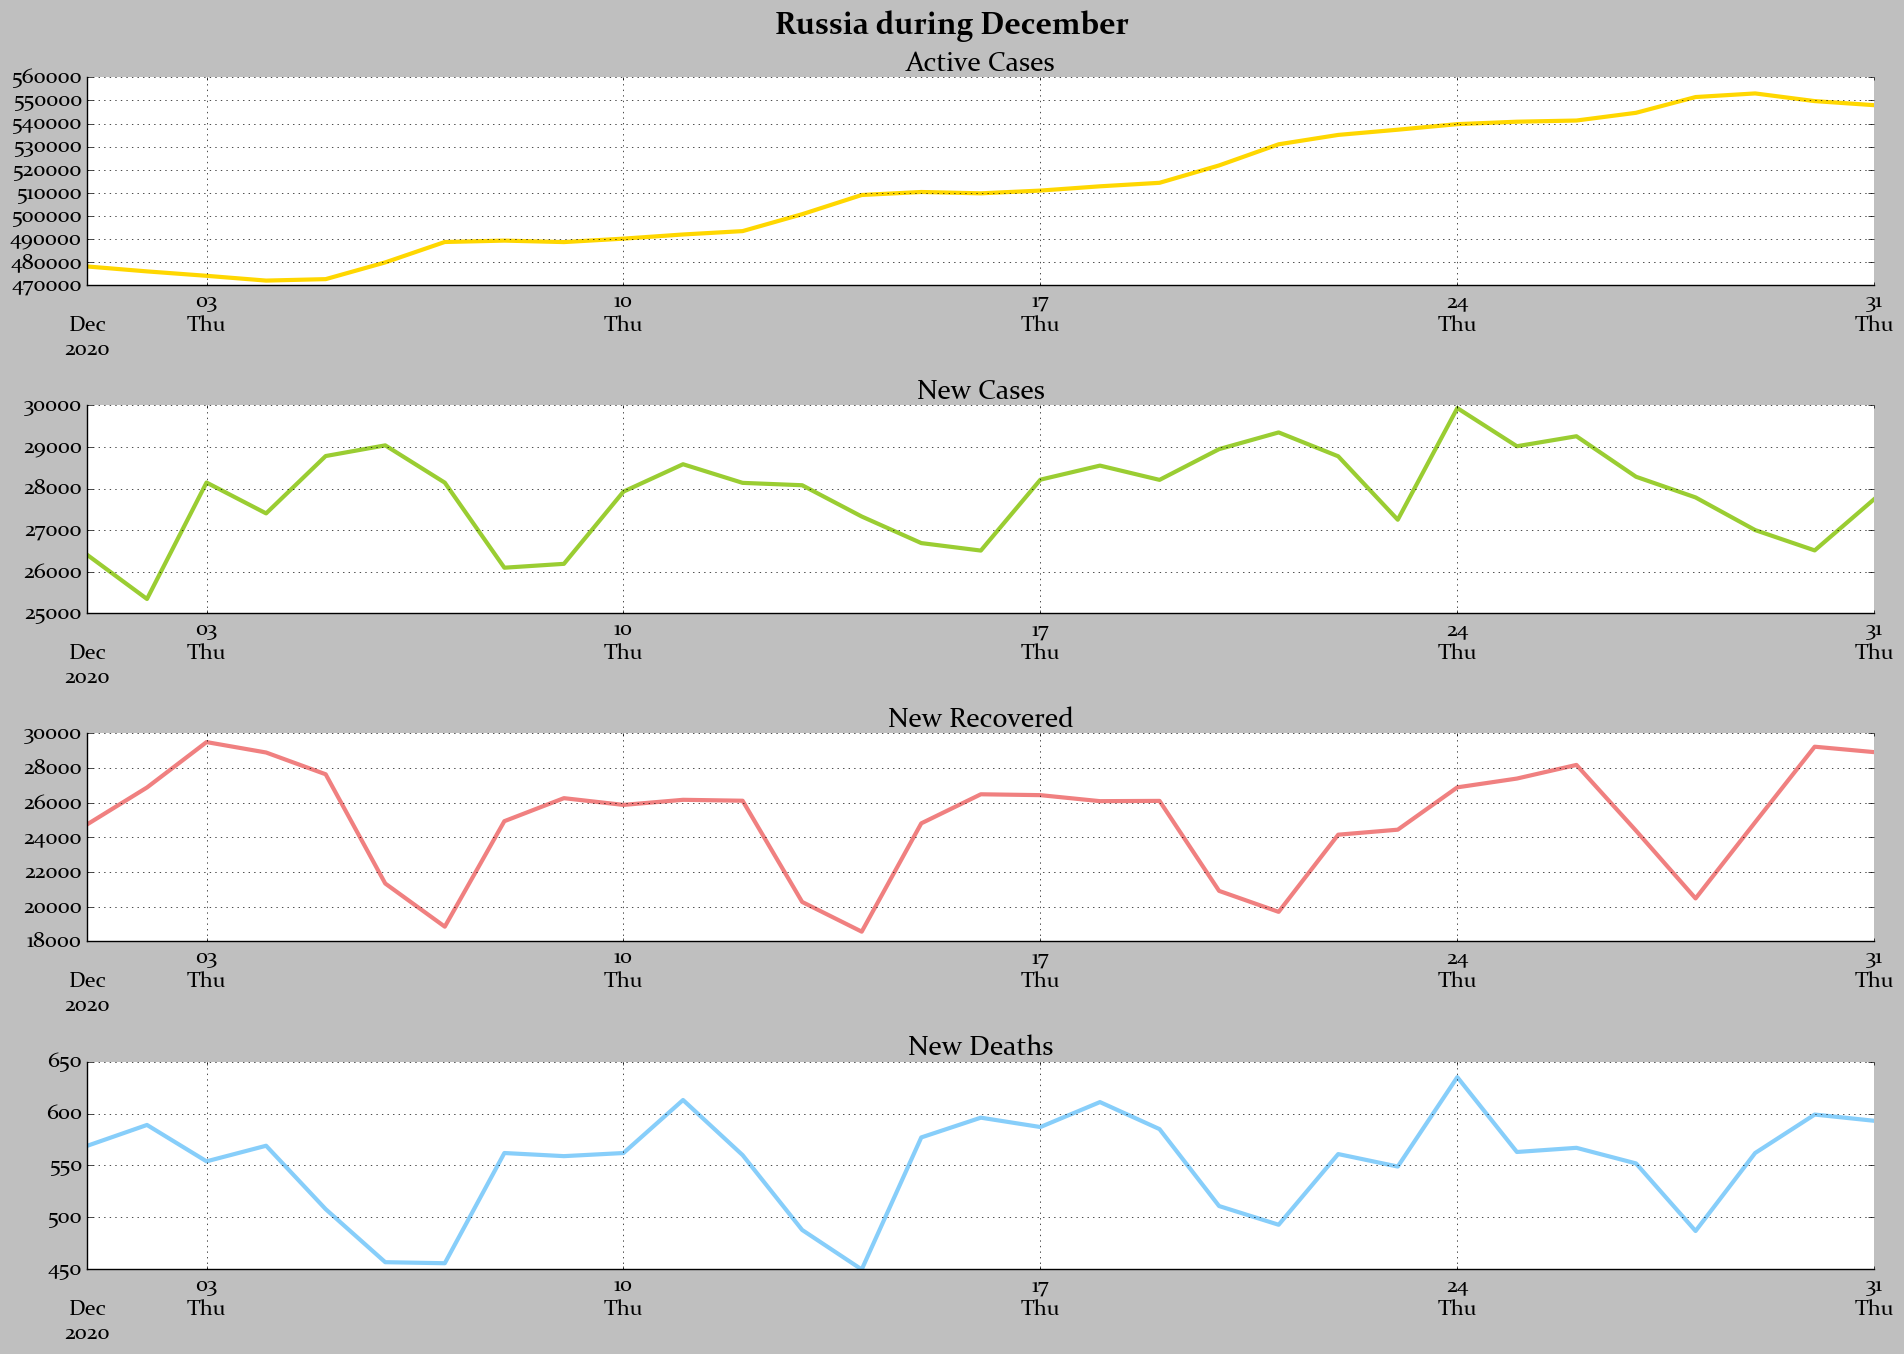

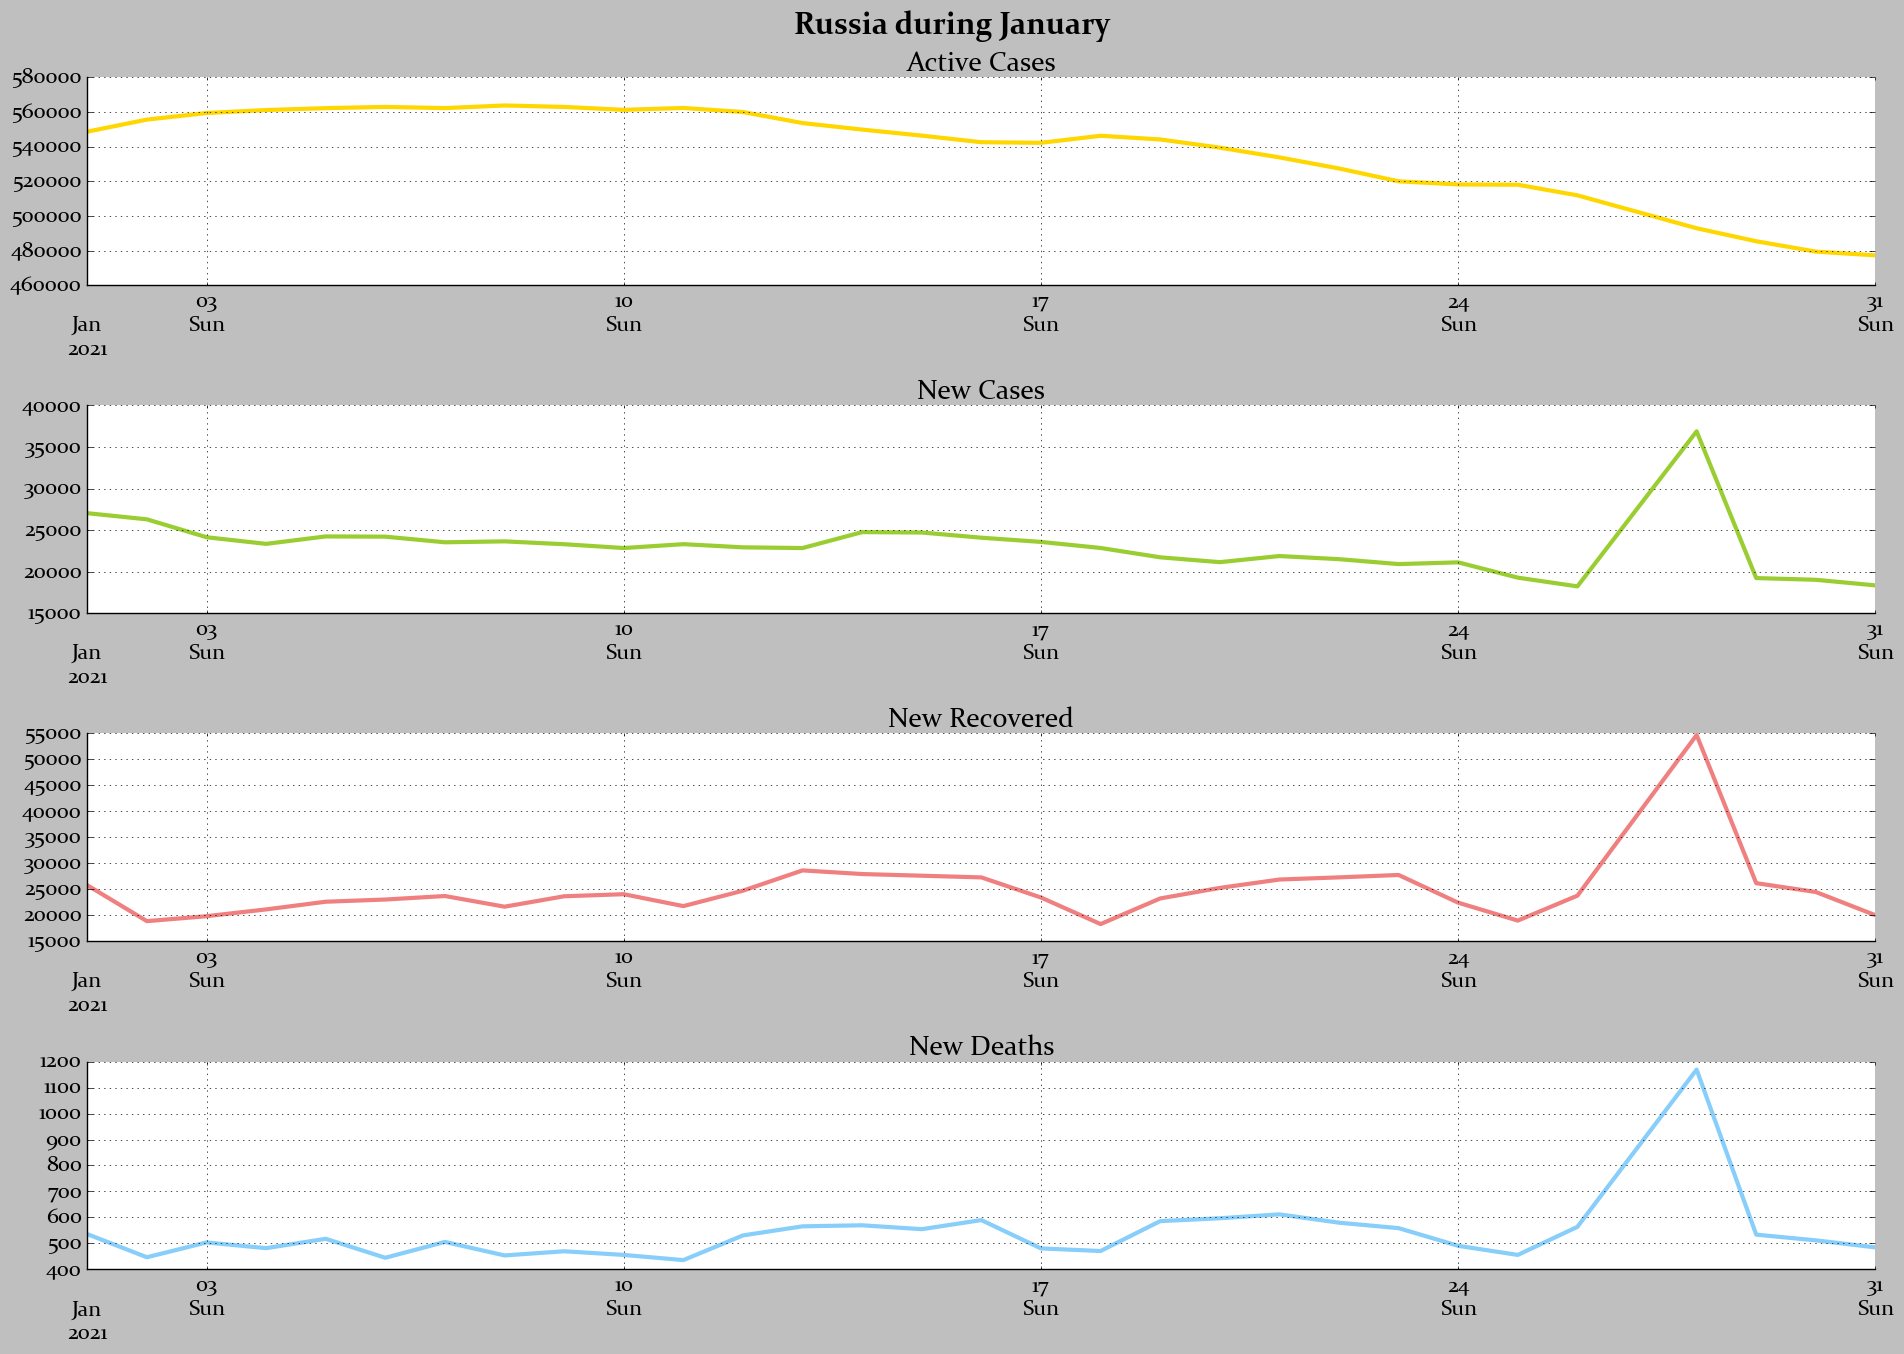

In [44]:
for month,year in zip(months_info['Month'].tolist(), months_info['Year'].tolist()):
    month_num = datetime.strptime(month[:3], "%b").month
    country.monthly_plot(['ActiveCases', 'NewCases', 'NewRecovered', 'NewDeaths'], month_num, year,save = True)

#### Daily increases in deaths, recoveries, active cases,new cases.

In [45]:
country.daily_increase3(save = True)


#### Closed cases ratio
$$TotalRecovered + TotalDeaths = TotalCases - ActiveCases$$

Answer:
    TotalRecovered TotalDeaths
173         97.83%       2.17%
Total time taken in closed_cases_pie function is: 0.0022166666666666667 minutes.


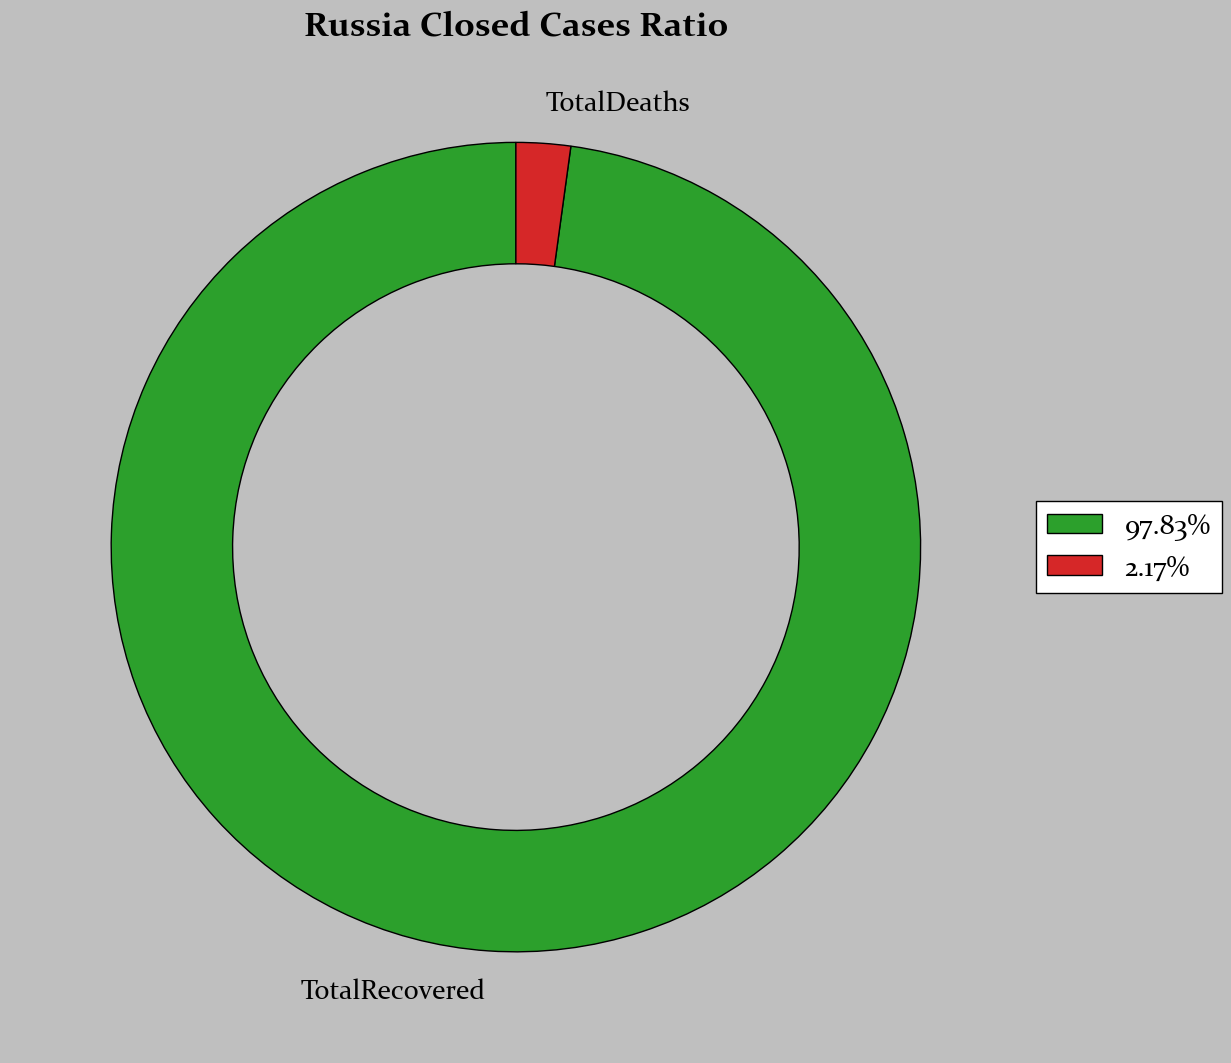

In [46]:
updated_totals = df[df['Date'].dt.date == country.last_update]\
    [['TotalCases', 'ActiveCases', 'TotalRecovered', 'TotalDeaths']]
res = (updated_totals[['TotalRecovered', 'TotalDeaths']] / (updated_totals['TotalCases']\
                                             .values[0] - updated_totals['ActiveCases'].values[0])) * 100
res = round(res, 3).astype(str) + '%'
print('Answer:')
print(res)
country.closed_cases_pie(save = True)

#### Measures Boxplot

In [47]:
country.boxplot(['ActiveCases'], save=True)

In [48]:
measures = ['NewCases','NewRecovered']
country.boxplot(measures, save=True)

In [49]:
country.boxplot(['NewDeaths'], save=True)

### Part Three - Basic Analysis

In [50]:
print("Q1.Find the date of the day with the highest New Cases.")
res_date = df[df['NewCases'] == df['NewCases'].max()]['Date'].dt.date
print('Answer:')
pd.DataFrame(res_date)

Q1.Find the date of the day with the highest New Cases.
Answer:


,Date
163,2021-01-28


In [51]:
print("Q2.Find the countries Case Fatality Ratio")
print('Answer: CFR= TotalDeaths/(TotalDeaths + TotalRecovered)')
country.case_fatality_ratio().astype('str') + '%'



Q2.Find the countries Case Fatality Ratio
Answer: CFR= TotalDeaths/(TotalDeaths + TotalRecovered)


'2.176%'